# why does the perceptron perform badly? 

LEts plot the two sets

         city  rain       date
0  Gothenburg     1 2025-07-01
1  Gothenburg     1 2025-12-01
2       Paris     0 2025-07-01
3       Paris     1 2025-12-01
     city  rain       date
0  Sydney     1 2025-07-01
1  Sydney     0 2025-12-01
2   Paris     0 2025-07-01
3   Paris     1 2025-12-01


Text(0.5, 0, 'Date')

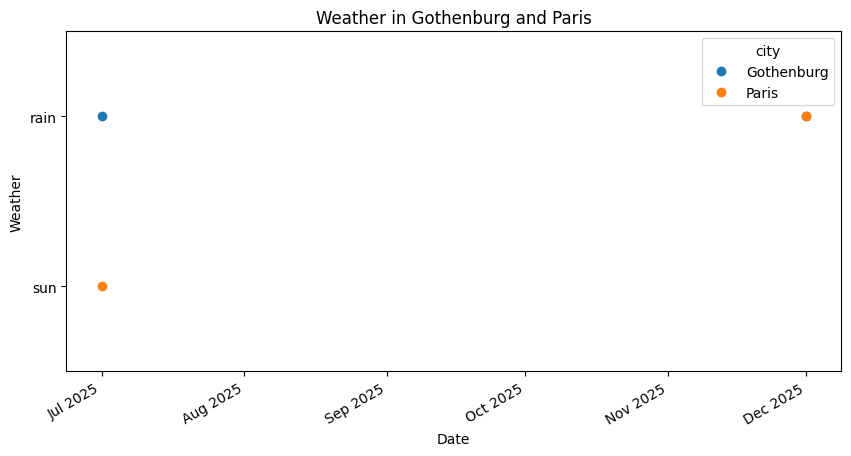

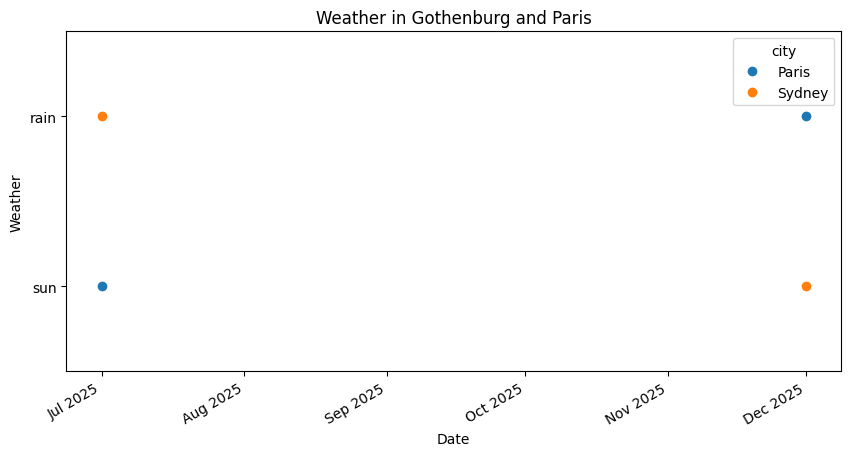

In [1]:

X1 = [{'city':'Gothenburg', 'month':'July'},
      {'city':'Gothenburg', 'month':'December'},
      {'city':'Paris', 'month':'July'},
      {'city':'Paris', 'month':'December'}]
Y1 = ['rain', 'rain', 'sun', 'rain']

X2 = [{'city':'Sydney', 'month':'July'},
      {'city':'Sydney', 'month':'December'},
      {'city':'Paris', 'month':'July'},
      {'city':'Paris', 'month':'December'}]
Y2 = ['rain', 'sun', 'sun', 'rain']

# plots
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import datetime as dt

# create a DataFrame from the data
df1 = pd.DataFrame(X1)
df1['rain'] = Y1
df1['rain'] = df1['rain'].map({'sun': 0, 'rain': 1})
df1['date'] = pd.to_datetime(df1['month'] + ' 1, 2025')

# drop month column
df1 = df1.drop(columns=['month'])
print(df1)

plot = df1.pivot(index='date', columns='city', values='rain')
# plot in a graph 
plot.plot(title='Weather in Gothenburg and Paris', figsize=(10, 5), marker='o', linestyle='None')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.gca().set_yticks([0, 1])
plt.gca().set_yticklabels(['sun', 'rain'])
plt.gca().set_ylim(-0.5, 1.5)
plt.gca().set_ylabel('Weather')
plt.gca().set_xlabel('Date')


df2 = pd.DataFrame(X2)
df2['rain'] = Y2
df2['rain'] = df2['rain'].map({'sun': 0, 'rain': 1})
df2['date'] = pd.to_datetime(df2['month'] + ' 1, 2025')

# drop month column
df2 = df2.drop(columns=['month'])
print(df2)

plot = df2.pivot(index='date', columns='city', values='rain')

# plot in a graph 
plot.plot(title='Weather in Gothenburg and Paris', figsize=(10, 5), marker='o', linestyle='None')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.gca().set_yticks([0, 1])
plt.gca().set_yticklabels(['sun', 'rain'])
plt.gca().set_ylim(-0.5, 1.5)
plt.gca().set_ylabel('Weather')
plt.gca().set_xlabel('Date')











As we can see the bottom one is not linearly separable.

## Task 3

In [ ]:
from sklearn.base import BaseEstimator
import numpy as np
import pandas as pd

class LinearClassifier(BaseEstimator):
    """
    General class for binary linear classifiers. Implements the predict
    function, which is the same for all binary linear classifiers. There are
    also two utility functions.
    """

    def decision_function(self, X):
        """
        Computes the decision function for the inputs X. The inputs are assumed to be
        stored in a matrix, where each row contains the features for one
        instance.
        """
        return X.dot(self.w)

    def predict(self, X):
        """
        Predicts the outputs for the inputs X. The inputs are assumed to be
        stored in a matrix, where each row contains the features for one
        instance.
        """

        # First compute the output scores
        scores = self.decision_function(X)

        # Select the positive or negative class label, depending on whether
        # the score was positive or negative.
        out = np.select([scores >= 0.0, scores < 0.0],
                        [self.positive_class,
                         self.negative_class])
        return out

    def find_classes(self, Y):
        """
        Finds the set of output classes in the output part Y of the training set.
        If there are exactly two classes, one of them is associated to positive
        classifier scores, the other one to negative scores. If the number of
        classes is not 2, an error is raised.
        """
        classes = sorted(set(Y))
        if len(classes) != 2:
            raise Exception("this does not seem to be a 2-class problem")
        self.positive_class = classes[1]
        self.negative_class = classes[0]

    def encode_outputs(self, Y):
        """
        A helper function that converts all outputs to +1 or -1.
        """
        return np.array([1 if y == self.positive_class else -1 for y in Y])



class Perceptron(LinearClassifier):
    """
    A straightforward implementation of the perceptron learning algorithm.
    """

    def __init__(self, n_iter=20):
        """
        The constructor can optionally take a parameter n_iter specifying how
        many times we want to iterate through the training set.
        """
        self.n_iter = n_iter

    def fit(self, X, Y):

        lamb = 1/X.shape[0]
        self.pegasos(X, Y, T=10000, lamb=lamb)
        # """
        # Train a linear classifier using the perceptron learning algorithm.
        # """

        # # First determine which output class will be associated with positive
        # # and negative scores, respectively.
        # self.find_classes(Y)

        # # Convert all outputs to +1 (for the positive class) or -1 (negative).
        # Ye = self.encode_outputs(Y)

        # # If necessary, convert the sparse matrix returned by a vectorizer
        # # into a normal NumPy matrix.
        # if not isinstance(X, np.ndarray):
        #     X = X.toarray()

        # # Initialize the weight vector to all zeros.
        # n_features = X.shape[1]
        # self.w = np.zeros(n_features)

        # # Perceptron algorithm:
        # for i in range(self.n_iter):
        #     for x, y in zip(X, Ye):

        #         # Compute the output score for this instance.
        #         score = x.dot(self.w)

        #         # If there was an error, update the weights.
        #         if y*score <= 0:
        #             self.w += y*x

    def pegasos(self, X, Y, T, lamb):
        self.find_classes(Y)
        Y = self.encode_outputs(Y)
        if not isinstance(X, np.ndarray):
            X = X.toarray()
        self.w = np.zeros(X.shape[1])

    
        for t in range(1,T):
            nt = 1/(lamb * t)
            iT = np.random.randint(0, X.shape[0])
            xT = X[iT]
            yT = Y[iT]

            if yT * self.w.dot(xT) < 1:
                self.w = (1-nt*lamb) * self.w + nt * yT * xT
            else:
                self.w = (1-nt*lamb) * self.w

       



import time
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score

def read_data(corpus_file):
    X = []
    Y = []
    with open(corpus_file, encoding='utf-8') as f:
        for line in f:
            _, y, _, x = line.split(maxsplit=3)
            X.append(x.strip())
            Y.append(y)
    return X, Y


X, Y = read_data('pa4/data/all_sentiment_shuffled.txt')
    
    # Split into training and test parts.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2,
                                                random_state=0)

# Set up the preprocessing steps and the classifier.
pipeline = make_pipeline(
    TfidfVectorizer(),
    SelectKBest(k=1000),
    Normalizer(),

    # NB that this is our Perceptron, not sklearn.linear_model.Perceptron
    Perceptron()  
)

# Train the classifier.
t0 = time.time()
pipeline.fit(Xtrain, Ytrain)
t1 = time.time()
print('Training time: {:.2f} sec.'.format(t1-t0))

# Evaluate on the test set.
Yguess = pipeline.predict(Xtest)
print('Accuracy: {:.4f}.'.format(accuracy_score(Ytest, Yguess)))



Training time: 2.35 sec.
Accuracy: 0.8154.


In [29]:


from sklearn.base import BaseEstimator
import numpy as np
import pandas as pd

class LinearClassifier(BaseEstimator):
    """
    General class for binary linear classifiers. Implements the predict
    function, which is the same for all binary linear classifiers. There are
    also two utility functions.
    """

    def decision_function(self, X):
        """
        Computes the decision function for the inputs X. The inputs are assumed to be
        stored in a matrix, where each row contains the features for one
        instance.
        """
        return X.dot(self.w)

    def predict(self, X):
        """
        Predicts the outputs for the inputs X. The inputs are assumed to be
        stored in a matrix, where each row contains the features for one
        instance.
        """

        # First compute the output scores
        scores = self.decision_function(X)

        # Select the positive or negative class label, depending on whether
        # the score was positive or negative.
        out = np.select([scores >= 0.0, scores < 0.0],
                        [self.positive_class,
                         self.negative_class])
        return out

    def find_classes(self, Y):
        """
        Finds the set of output classes in the output part Y of the training set.
        If there are exactly two classes, one of them is associated to positive
        classifier scores, the other one to negative scores. If the number of
        classes is not 2, an error is raised.
        """
        classes = sorted(set(Y))
        if len(classes) != 2:
            raise Exception("this does not seem to be a 2-class problem")
        self.positive_class = classes[1]
        self.negative_class = classes[0]

    def encode_outputs(self, Y):
        """
        A helper function that converts all outputs to +1 or -1.
        """
        return np.array([1 if y == self.positive_class else -1 for y in Y])



class Perceptron(LinearClassifier):
    """
    A straightforward implementation of the perceptron learning algorithm.
    """

    def __init__(self, n_iter=20):
        """
        The constructor can optionally take a parameter n_iter specifying how
        many times we want to iterate through the training set.
        """
        self.n_iter = n_iter

    def fit(self, X, Y):

        lamb = 1/X.shape[0]
        self.logLoss(X, Y, T=100000, lamb=lamb)
        # """
        # Train a linear classifier using the perceptron learning algorithm.
        # """

        # # First determine which output class will be associated with positive
        # # and negative scores, respectively.
        # self.find_classes(Y)

        # # Convert all outputs to +1 (for the positive class) or -1 (negative).
        # Ye = self.encode_outputs(Y)

        # # If necessary, convert the sparse matrix returned by a vectorizer
        # # into a normal NumPy matrix.
        # if not isinstance(X, np.ndarray):
        #     X = X.toarray()

        # # Initialize the weight vector to all zeros.
        # n_features = X.shape[1]
        # self.w = np.zeros(n_features)

        # # Perceptron algorithm:
        # for i in range(self.n_iter):
        #     for x, y in zip(X, Ye):

        #         # Compute the output score for this instance.
        #         score = x.dot(self.w)

        #         # If there was an error, update the weights.
        #         if y*score <= 0:
        #             self.w += y*x
    def logLoss(self, X, Y, T, lamb):
        self.find_classes(Y)
        Y = self.encode_outputs(Y)
        if not isinstance(X, np.ndarray):
            X = X.toarray()
        self.w = np.zeros(X.shape[1])


        for t in range(1,T):
            nt = 1/(lamb * t)
            iT = np.random.randint(0, X.shape[0])
            xT = X[iT]
            yT = Y[iT]

            self.w = self.w - nt * lamb * self.w + -yT/(1 + np.exp(yT * self.w.dot(xT))) * xT
       



import time
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score

def read_data(corpus_file):
    X = []
    Y = []
    with open(corpus_file, encoding='utf-8') as f:
        for line in f:
            _, y, _, x = line.split(maxsplit=3)
            X.append(x.strip())
            Y.append(y)
    return X, Y


X, Y = read_data('pa4/data/all_sentiment_shuffled.txt')
    
    # Split into training and test parts.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2,
                                                random_state=0)

# Set up the preprocessing steps and the classifier.
pipeline = make_pipeline(
    TfidfVectorizer(),
    SelectKBest(k=1000),
    Normalizer(),

    # NB that this is our Perceptron, not sklearn.linear_model.Perceptron
    Perceptron()  
)

# Train the classifier.
t0 = time.time()
pipeline.fit(Xtrain, Ytrain)
t1 = time.time()
print('Training time: {:.2f} sec.'.format(t1-t0))

# Evaluate on the test set.
Yguess = pipeline.predict(Xtest)
print('Accuracy: {:.4f}.'.format(accuracy_score(Ytest, Yguess)))





C:\Users\casha\AppData\Local\Temp\ipykernel_28584\2465120290.py:118: RuntimeWarning: overflow encountered in exp
  self.w = self.w - nt * lamb * self.w + -yT/(1 + np.exp(yT * self.w.dot(xT))) * xT


Training time: 5.04 sec.
Accuracy: 0.5031.


it is worse than the previous one. 